**1. Считать в pandas.DataFrame любой источник данных**: CSV, JSON, Excel-файл, HTML-таблицу и т.п. Также можно сконвертировать в DataFrame любой из встроенных датасетов sklearn: (см. инструкцию).

In [2]:
import pandas as pd

In [3]:
# URL для загрузки датасета
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

# Названия колонок
columns = ["symboling", "normalized-losses", "make", "fuel-type", "body-style", "drive-wheels", "engine-location",
           "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size",
           "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

# Загрузка данных в pandas.DataFrame
df = pd.read_csv(url, names=columns, na_values="?", header=None)

# Вывод первых пяти строк DataFrame
print(df.head())

           symboling normalized-losses make fuel-type   body-style  \
3 NaN    alfa-romero               gas  std       two  convertible   
  NaN    alfa-romero               gas  std       two  convertible   
1 NaN    alfa-romero               gas  std       two    hatchback   
2 164.0         audi               gas  std      four        sedan   
  164.0         audi               gas  std      four        sedan   

        drive-wheels engine-location  wheel-base  length  width  ...  \
3 NaN            rwd           front        88.6   168.8   64.1  ...   
  NaN            rwd           front        88.6   168.8   64.1  ...   
1 NaN            rwd           front        94.5   171.2   65.5  ...   
2 164.0          fwd           front        99.8   176.6   66.2  ...   
  164.0          4wd           front        99.4   176.6   66.4  ...   

         engine-size  fuel-system  bore stroke  compression-ratio horsepower  \
3 NaN            130         mpfi  3.47   2.68                9.0 

**2. Привести описание датасета.**

In [4]:
df.head()

symboling normalized-losses make fuel-type   body-style  \
3 NaN    alfa-romero               gas  std       two  convertible   
  NaN    alfa-romero               gas  std       two  convertible   
1 NaN    alfa-romero               gas  std       two    hatchback   
2 164.0         audi               gas  std      four        sedan   
  164.0         audi               gas  std      four        sedan   

        drive-wheels engine-location  wheel-base  length  width  ...  \
3 NaN            rwd           front        88.6   168.8   64.1  ...   
  NaN            rwd           front        88.6   168.8   64.1  ...   
1 NaN            rwd           front        94.5   171.2   65.5  ...   
2 164.0          fwd           front        99.8   176.6   66.2  ...   
  164.0          4wd           front        99.4   176.6   66.4  ...   

         engine-size  fuel-system  bore stroke  compression-ratio horsepower  \
3 NaN            130         mpfi  3.47   2.68                9.0      111.0   
  NaN            130         mpfi  3.47   2.68                9.0      111.0   
1 NaN            152         mpfi  2.68   3.47                9.0      154.0   
2 164.0          109         mpfi  3.19   3.40               10.0      102.0   
  164.0          136         mpfi  3.19   3.40                8.0      115.0   

         peak-rpm  city-mpg  highway-mpg    price  
3 NaN      5000.0        21           27  13495.0  
  NaN      5000.0        21           27  16500.0  
1 NaN      5000.0        19           26  16500.0  
2 164.0    5500.0        24           30  13950.0  
  164.0    5500.0        18           22  17450.0  

[5 rows x 24 columns]

Датасет "Automobile Data Set" из репозитория UCI Machine Learning. Этот датасет содержит информацию о различных автомобилях, включая числовые признаки, такие как цена, объем двигателя, количество лошадиных сил, а также категориальные признаки, такие как тип кузова, количество дверей, тип привода и т.д.

**3. matplotlib:**

In [5]:
import matplotlib.pyplot as plt

Построить несколько графиков разного вида с использованием matplotlib.

Построить несколько суб-графиков на одном графике используя .subplot.

Построить интерактивный график со слайдером.

Графики должны быть разных видов.

Хотя бы в одном графике необходимо подписать оси.

Во всех графиках необходимо указать название.

Необязательно строить сложный и перегруженный информацией интерактивный график, достаточно одного-двух числовых признаков в разрезе другого признака, как минимум добавить слайдер (ползунок). Наличие других графических элементов управления (кнопки и т.п.) - опционально.

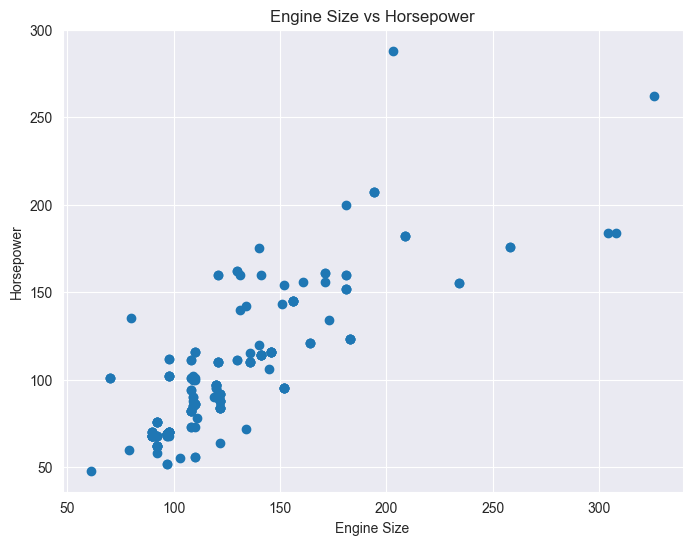

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(df['engine-size'], df['horsepower'])
plt.title('Engine Size vs Horsepower')
plt.xlabel('Engine Size')
plt.ylabel('Horsepower')
plt.show()

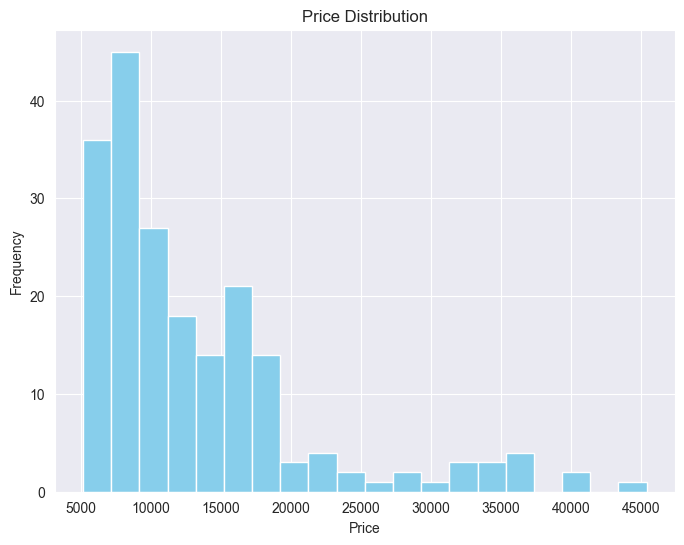

In [7]:
# Гистограмма (histogram)
plt.figure(figsize=(8, 6))
plt.hist(df['price'], bins=20, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Субграфики (subplots)

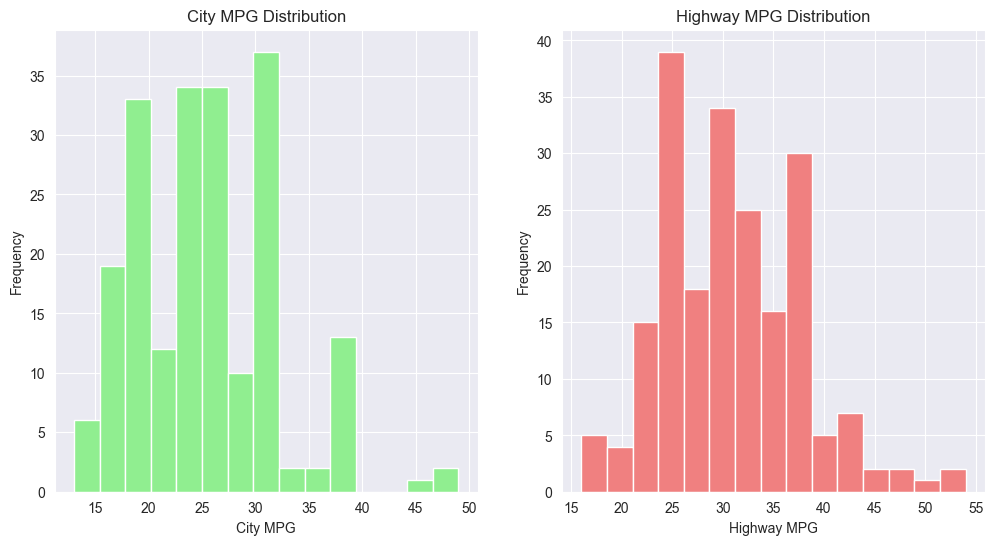

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].hist(df['city-mpg'], bins=15, color='lightgreen')
axs[0].set_title('City MPG Distribution')
axs[0].set_xlabel('City MPG')
axs[0].set_ylabel('Frequency')
axs[1].hist(df['highway-mpg'], bins=15, color='lightcoral')
axs[1].set_title('Highway MPG Distribution')
axs[1].set_xlabel('Highway MPG')
axs[1].set_ylabel('Frequency')
plt.show()

Создадим три суб-графика на одном графике

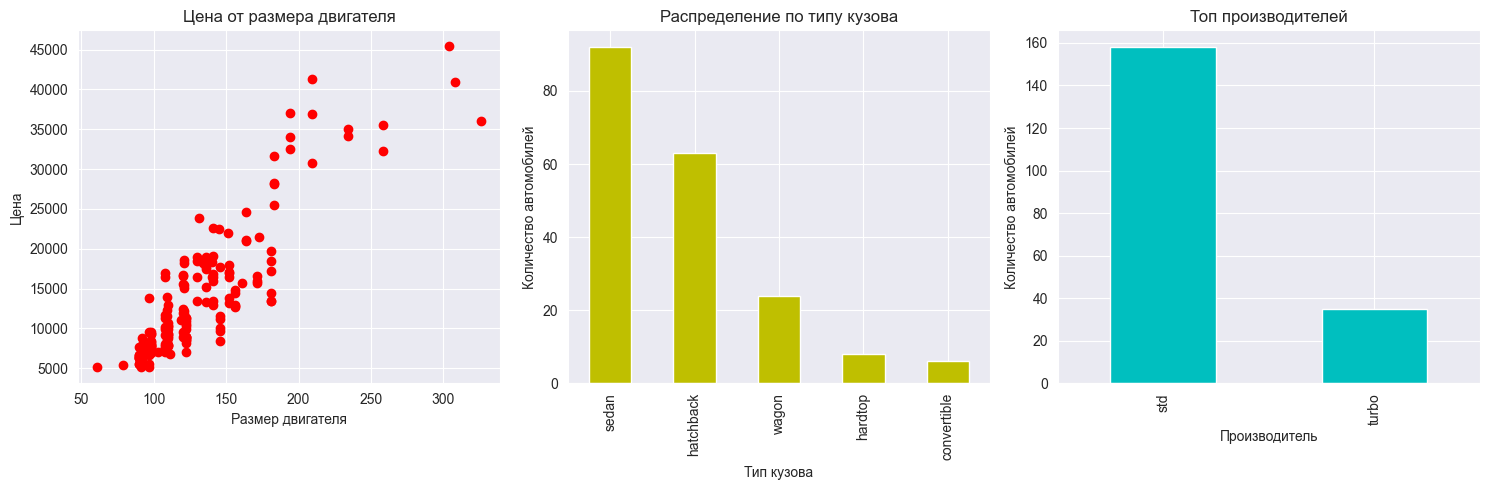

In [9]:
# Очистка данных — удаление строк с отсутствующими значениями
df_cleaned = df.dropna()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# График 1
axes[0].scatter(df_cleaned['engine-size'], df_cleaned['price'], color='r')
axes[0].set_title('Цена от размера двигателя')
axes[0].set_xlabel('Размер двигателя')
axes[0].set_ylabel('Цена')

# График 2
df_cleaned['body-style'].value_counts().plot(kind='bar', ax=axes[1], color='y')
axes[1].set_title('Распределение по типу кузова')
axes[1].set_xlabel('Тип кузова')
axes[1].set_ylabel('Количество автомобилей')

# График 3
df_cleaned['make'].value_counts().head(10).plot(kind='bar', ax=axes[2], color='c')
axes[2].set_title('Топ производителей')
axes[2].set_xlabel('Производитель')
axes[2].set_ylabel('Количество автомобилей')

plt.tight_layout()
plt.show()

Интерактивный график

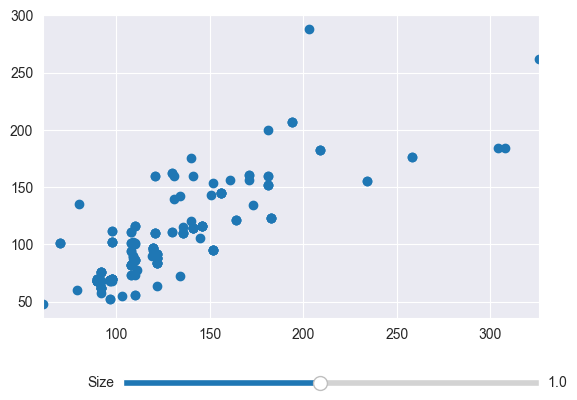

In [10]:
import numpy as np
from matplotlib.widgets import Slider

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)
x = df['engine-size']
y = df['horsepower']
sc = plt.scatter(x, y)
ax.margins(x=0)

axcolor = 'lightgoldenrodyellow'
ax_size = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
s_size = Slider(ax_size, 'Size', 0.1, 2.0, valinit=1)

def update(val):
    size = s_size.val
    sc.set_sizes(300 * size * np.abs(y / max(y)))
    fig.canvas.draw_idle()

s_size.on_changed(update)

plt.show()

**4. pandas:**

Построить три разных вида графиков с использованием pandas.DataFrame.plot / Series.plot.

Среди графиков должен присутствовать один boxplot (обязательно надо использовать параметр by, для исследования взаимосвязи числовой переменной и какой-либо другой).

Графики должны быть построены как через методы DataFrame, так и через методы Series. То есть оба варианта нужно продемонстрировать.

Графики с использованием DataFrame.plot

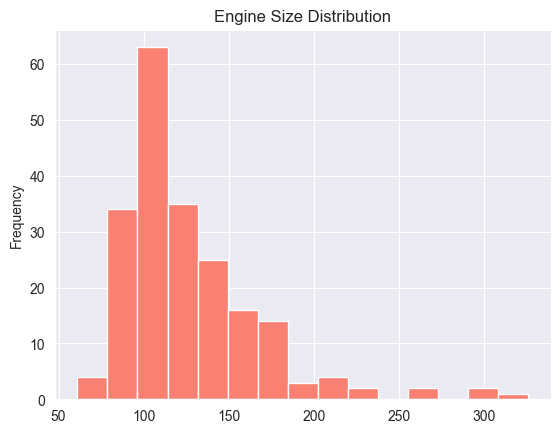

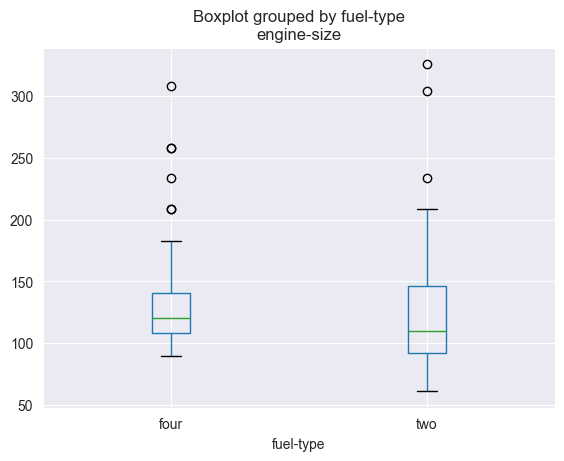

In [11]:
# Гистограмма
df['engine-size'].plot(kind='hist', bins=15, color='salmon', title='Engine Size Distribution')

# Ящик с усами
df.boxplot(column='engine-size', by='fuel-type')

plt.show()

Графики с использованием Series.plot

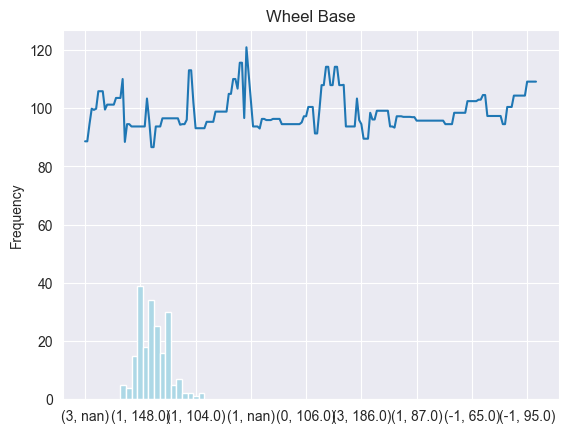

In [12]:
# Гистограмма
df['highway-mpg'].plot.hist(bins=15, color='lightblue', title='Highway MPG Distribution')

# Линейный график
df['wheel-base'].plot.line(title='Wheel Base')

plt.show()

**5. seaborn:**

In [13]:
import seaborn as sns

Построить .pairplot на каком-либо наборе данных, проанализировать взаимосвязь набора числовых признаков.

Построить .jointplot, проанализировать взаимосвязь двух конкретных числовых признаков.

Построить .boxplot и/или .violinplot на каком-либо наборе данных, проанализировать числовой признак в разрезе категориального.

Построить график .heatmap попарной корреляции всех числовых признаков.

Категориальные признаки необходимо убрать из датафрейма перед построением.

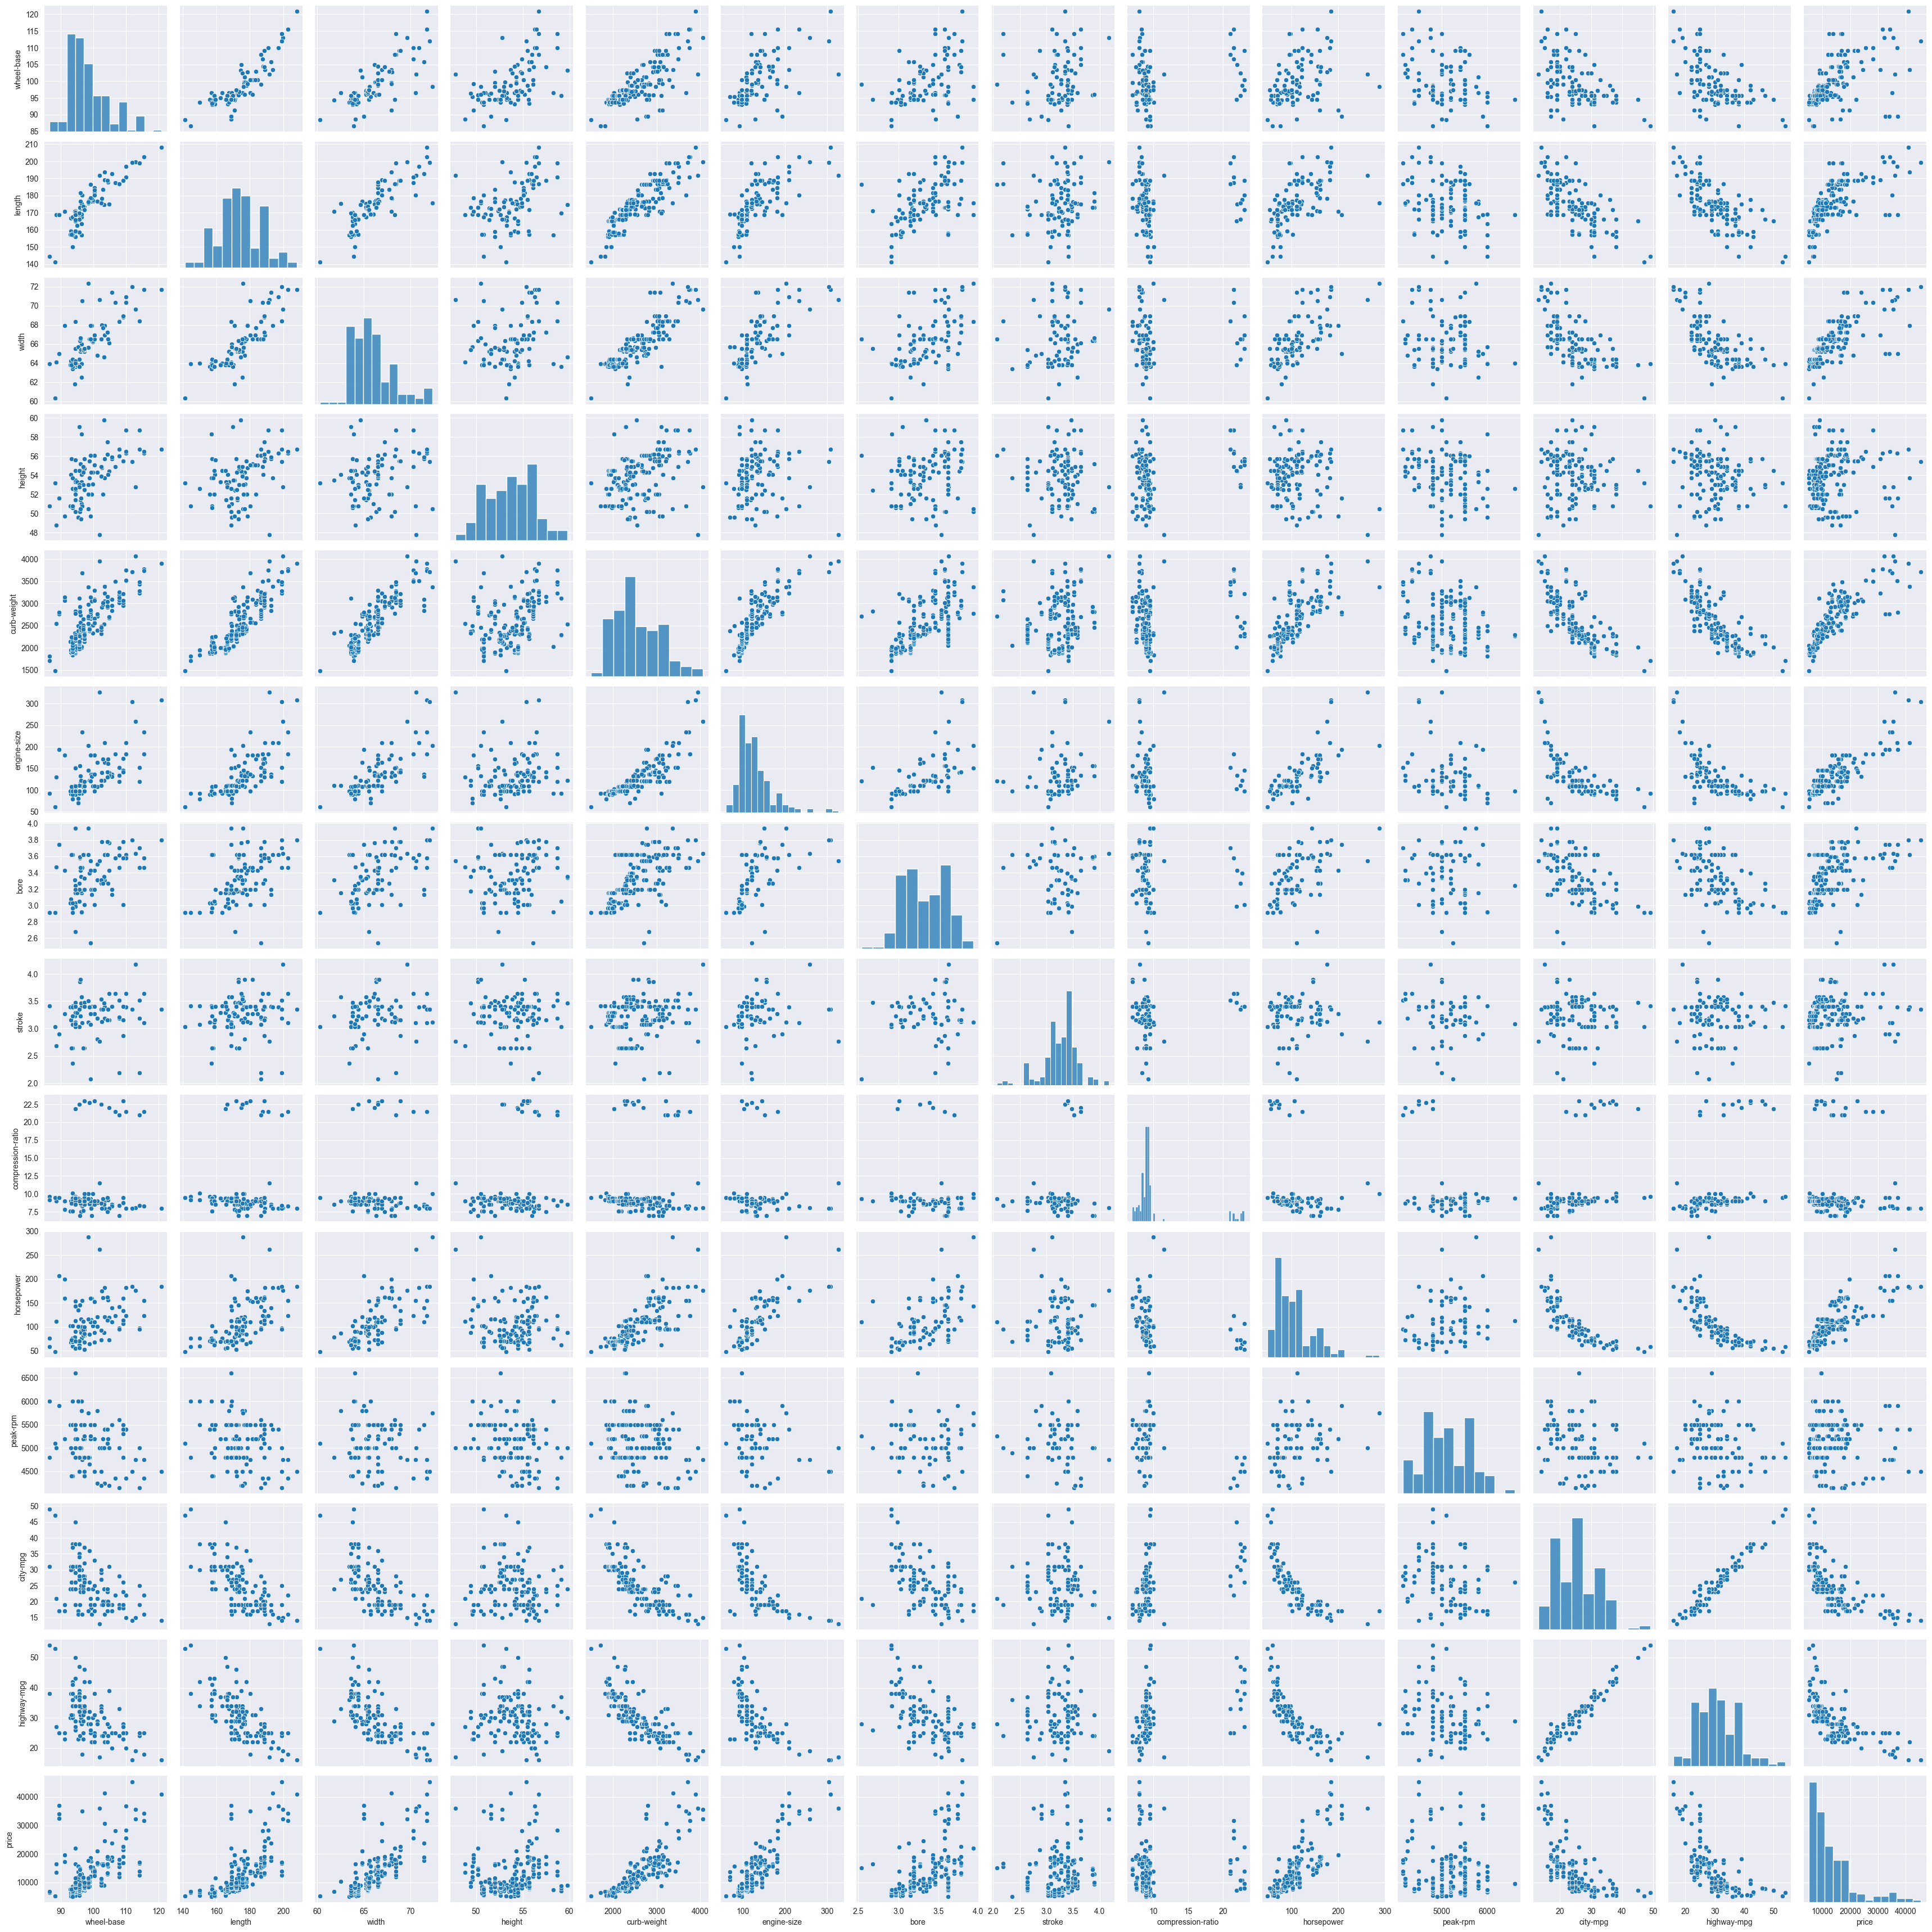

In [14]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
# Сброс мультииндекса
numerical_df.reset_index(drop=True, inplace=True)

# Теперь повторно используем код для визуализации данных
# 1. Построение pairplot
sns.pairplot(numerical_df)
plt.show()

Построение jointplot для двух числовых признаков, например, 'engine-size' и 'horsepower'

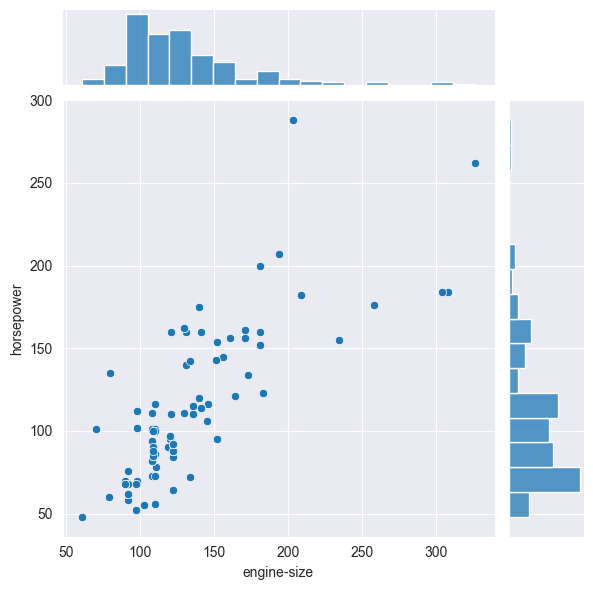

In [15]:
sns.jointplot(x='engine-size', y='horsepower', data=numerical_df, kind='scatter')
plt.show()

Построение boxplot или violinplot для анализа числового признака 'price' в разрезе категориального признака 'make'

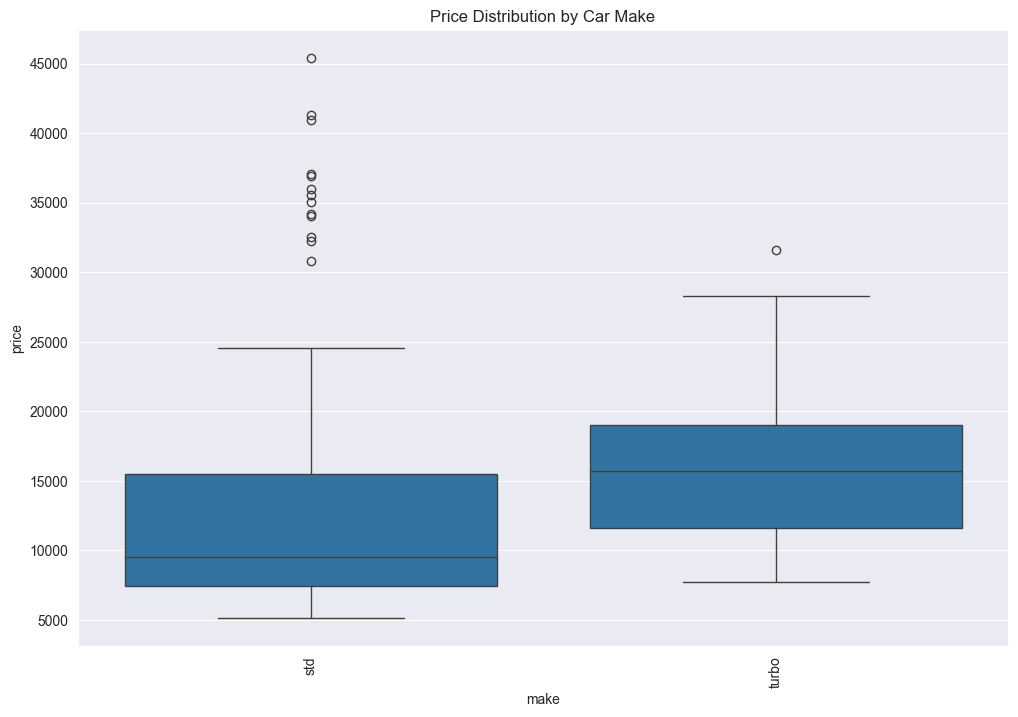

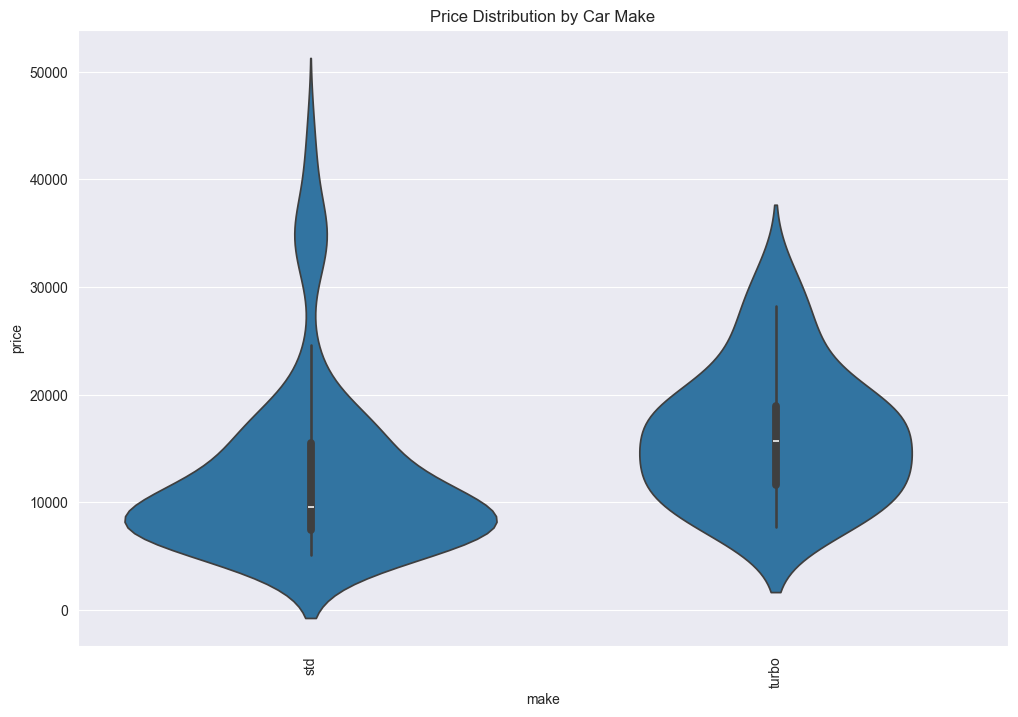

In [16]:
# Reset the index of the DataFrame
df_reset_index = df.reset_index()

# Построение boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='make', y='price', data=df_reset_index)
plt.title('Price Distribution by Car Make')
plt.xticks(rotation=90)
plt.show()

# Построение violinplot
plt.figure(figsize=(12, 8))
sns.violinplot(x='make', y='price', data=df_reset_index)
plt.title('Price Distribution by Car Make')
plt.xticks(rotation=90)
plt.show()

Построение графика heatmap попарной корреляции всех числовых признаков

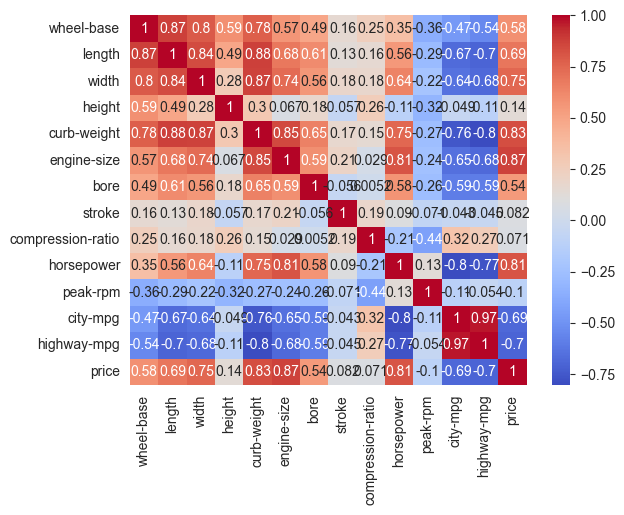

In [17]:
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

**6. scipy.stats:**

In [18]:
import scipy.stats as stats

Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению.

Построение QQ-графика и гистограммы для числового признака, например, 'engine-size'

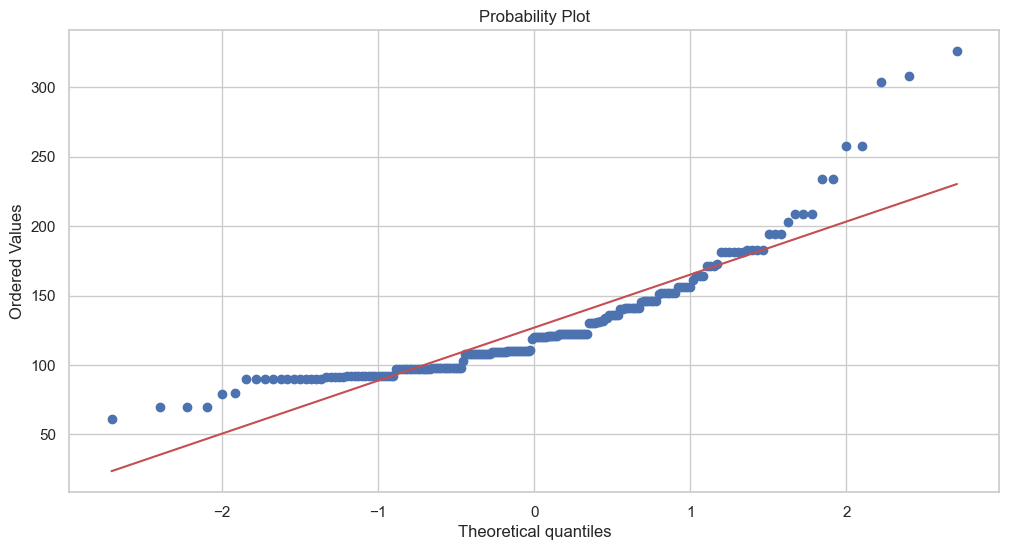

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
stats.probplot(df['engine-size'], dist="norm", plot=plt)
plt.show()

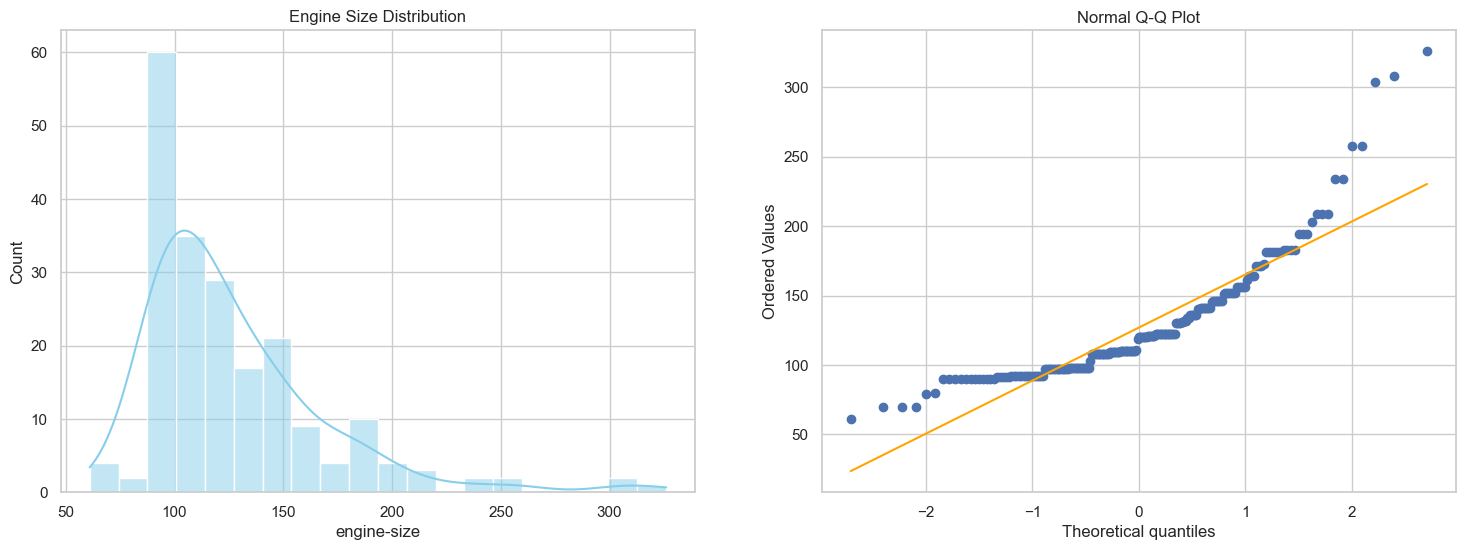

In [20]:
sns.set(style="whitegrid")

# Создание области для графиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Гистограмма для распределения признака
sns.histplot(df['engine-size'], kde=True, color='skyblue', bins=20, ax=ax1)
ax1.set_title('Engine Size Distribution')

# QQ-график для проверки соответствия нормальному распределению
stats.probplot(df['engine-size'], dist="norm", plot=ax2)
ax2.get_lines()[1].set_color('orange')
ax2.set_title('Normal Q-Q Plot')

plt.show()

**7. plotly:**

In [21]:
import plotly.express as px

Построить несколько графиков разного вида.

Построить несколько суб-графиков на одном графике.

Построить интерактивный график.

Использование Dash опционально.

График рассеяния (scatter plot) для столбцов "engine-size" и "horsepower"

In [22]:
scatter_plot = px.scatter(df, x="engine-size", y="horsepower", title='Engine Size vs Horsepower')
scatter_plot.show()

Гистограмма для столбца "price"

In [23]:
histogram = px.histogram(df, x="price", title='Car Price Distribution')
histogram.show()

Ящик с усами (box plot) для столбцов "body-style" и "price"

In [24]:
box_plot = px.box(df, x="body-style", y="price", points="all", title='Price Distribution by Body Style')
box_plot.show()

Построение нескольких суб-графиков на одном графике

In [25]:
fig = px.scatter_matrix(df, dimensions=["engine-size", "horsepower", "curb-weight"])
fig.update_layout(title='Correlation between Engine Size, Horsepower, and Curb Weight')
fig.show()

In [26]:
import plotly.express as px

# Удалим строки с отсутствующими значениями
df_filtered = df.dropna(subset=['engine-size', 'horsepower', 'body-style'])

# Уникальные типы кузова
body_styles = df_filtered['body-style'].unique()

# Создание фигур с разными фильтрами
fig = px.scatter(
    df_filtered,
    x="engine-size",
    y="horsepower",
    animation_frame="body-style",  # позволяет использовать слайдер
    title="Engine Size vs Horsepower by Body Style",
    labels={"engine-size": "Engine Size", "horsepower": "Horsepower"},
    color="make"
)
fig.update_layout(transition_duration=500)
fig.show()


In [27]:
import plotly.graph_objects as go

fig = go.Figure()

# Добавим три разных вида графика
fig.add_trace(go.Scatter(x=df['engine-size'], y=df['horsepower'], mode='markers', name='Scatter'))
fig.add_trace(go.Bar(x=df['engine-size'], y=df['horsepower'], name='Bar'))
fig.add_trace(go.Box(y=df['horsepower'], name='Box'))

# Кнопки управления
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="Scatter",
                     method="update",
                     args=[{"visible": [True, False, False]},
                           {"title": "Scatter Plot"}]),
                dict(label="Bar",
                     method="update",
                     args=[{"visible": [False, True, False]},
                           {"title": "Bar Plot"}]),
                dict(label="Box",
                     method="update",
                     args=[{"visible": [False, False, True]},
                           {"title": "Box Plot"}]),
            ]),
            direction="down",
        )
    ]
)
fig.update_layout(title="Choose a Plot Type")
fig.show()


In [28]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=("Engine Size vs Horsepower", "City MPG Distribution"))

fig.add_trace(
    go.Scatter(x=df['engine-size'], y=df['horsepower'], mode='markers', name='Engine vs HP'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=df['city-mpg'], name='City MPG', marker_color='lightgreen'),
    row=1, col=2
)

fig.update_layout(title_text="Subplots Example", showlegend=False)
fig.show()
